<a href="https://colab.research.google.com/github/NourBououn/fullpack-ia-module-1-fullpack-ia-module1-DataAnalysis/blob/master/Analyse_des_S%C3%A9ries_Temporelles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
#1. Charger le dataset et afficher les premières lignes
data = pd.read_csv('/content/drive/MyDrive/Full Pack AI/Data analysist/daily-minimum-temperatures-in-me.csv',  encoding='latin1') #Délimiter nahouh lahna

In [5]:
data

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8
...,...,...
3645,12/27/1990,14
3646,12/28/1990,13.6
3647,12/29/1990,13.5
3648,12/30/1990,15.7


In [6]:
data.head(5)

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        3650 non-null   object
 1   Daily minimum temperatures  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


In [8]:
data["Date"] = pd.to_datetime(data["Date"])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        3650 non-null   datetime64[ns]
 1   Daily minimum temperatures  3650 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 57.2+ KB


In [10]:
print(data.isnull().sum())

Date                          0
Daily minimum temperatures    0
dtype: int64


In [11]:
data = data.dropna()

In [12]:
data["Daily minimum temperatures"].describe()

,Daily minimum temperatures
count,3650
unique,230
top,11
freq,51


In [13]:
import matplotlib.pyplot as plt

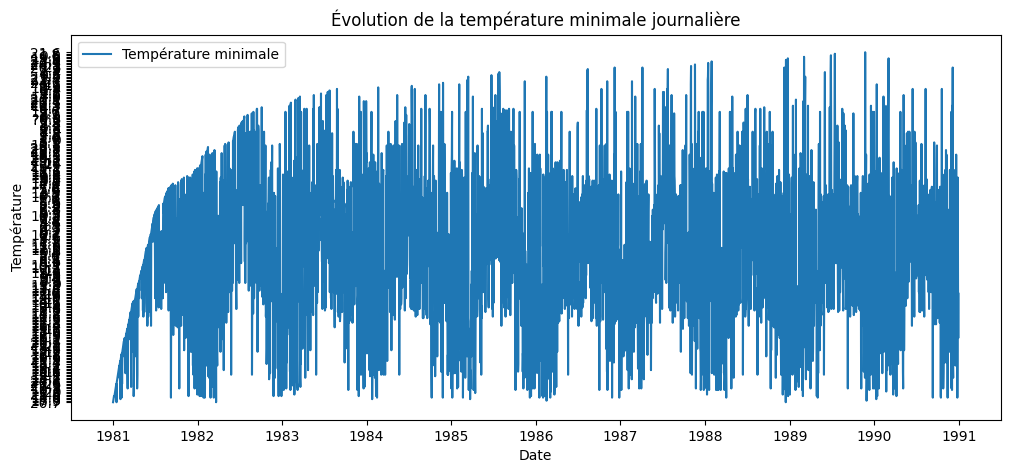

In [14]:
plt.figure(figsize=(12, 5))
plt.plot(data["Date"], data["Daily minimum temperatures"], label="Température minimale")
plt.xlabel("Date")
plt.ylabel("Température")
plt.title("Évolution de la température minimale journalière")
plt.legend()
plt.show()

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
data.columns = data.columns.str.strip()

In [19]:
data["Daily minimum temperatures"] = pd.to_numeric(data["Daily minimum temperatures"], errors="coerce")

In [20]:
print(data.isnull().sum())  # Vérifie combien de valeurs sont NaN
data = data.dropna()  # Supprime les lignes avec NaN

Date                          0
Daily minimum temperatures    3
dtype: int64


In [21]:
print(data.info())  # Vérifie si la colonne est bien passée en float64
print(data.head())  # Affiche les premières lignes après correction

<class 'pandas.core.frame.DataFrame'>
Index: 3647 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        3647 non-null   datetime64[ns]
 1   Daily minimum temperatures  3647 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.5 KB
None
        Date  Daily minimum temperatures
0 1981-01-01                        20.7
1 1981-01-02                        17.9
2 1981-01-03                        18.8
3 1981-01-04                        14.6
4 1981-01-05                        15.8


In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

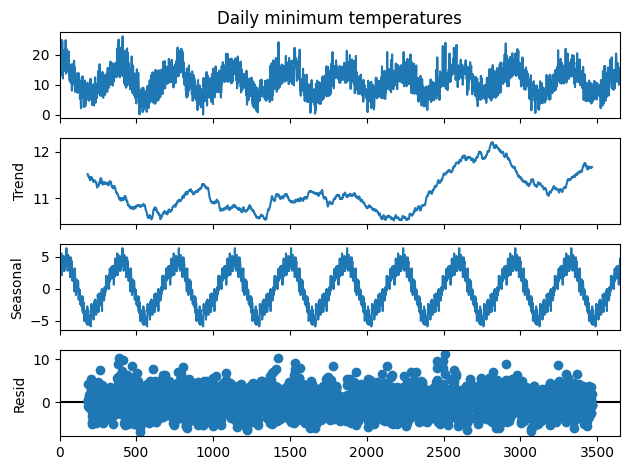

In [23]:
decomposition = seasonal_decompose(data["Daily minimum temperatures"], period=365, model="additive")
decomposition.plot()
plt.show()

In [24]:
print(data.info())  # Vérifie si "Temp" est bien numérique

<class 'pandas.core.frame.DataFrame'>
Index: 3647 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        3647 non-null   datetime64[ns]
 1   Daily minimum temperatures  3647 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.5 KB
None


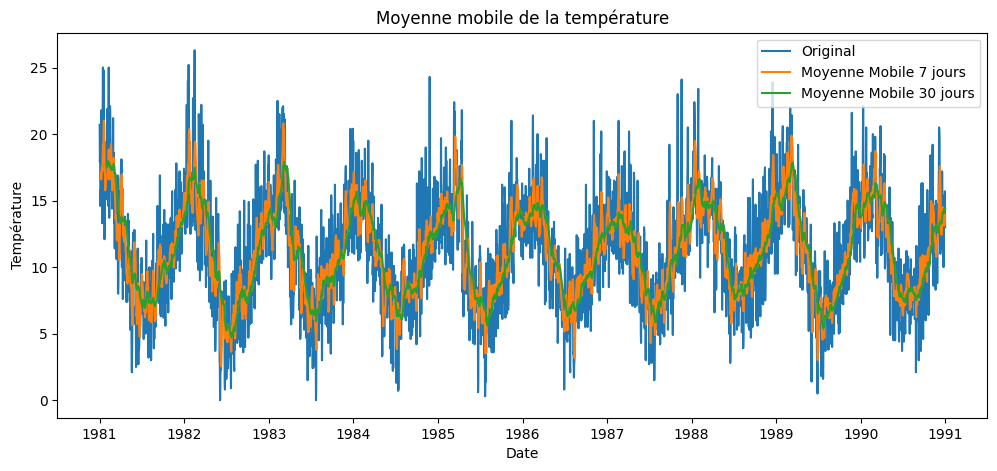

In [26]:
data["SMA_7"] = data["Daily minimum temperatures"].rolling(window=7).mean()
data["SMA_30"] = data["Daily minimum temperatures"].rolling(window=30).mean()

plt.figure(figsize=(12, 5))
plt.plot(data["Date"], data["Daily minimum temperatures"], label="Original")
plt.plot(data["Date"], data["SMA_7"], label="Moyenne Mobile 7 jours")
plt.plot(data["Date"], data["SMA_30"], label="Moyenne Mobile 30 jours")
plt.xlabel("Date")
plt.ylabel("Température")
plt.title("Moyenne mobile de la température")
plt.legend()
plt.show()

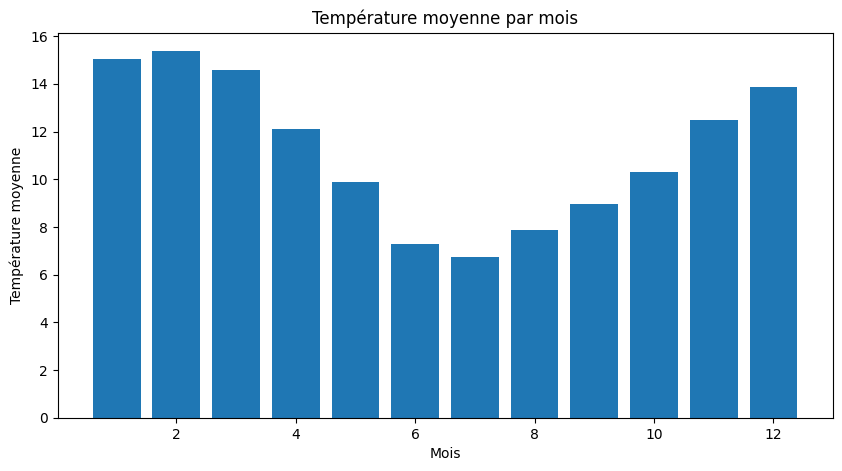

In [27]:
data["Month"] = data["Date"].dt.month
monthly_avg = data.groupby("Month")["Daily minimum temperatures"].mean()

plt.figure(figsize=(10, 5))
plt.bar(monthly_avg.index, monthly_avg.values)
plt.xlabel("Mois")
plt.ylabel("Température moyenne")
plt.title("Température moyenne par mois")
plt.show()

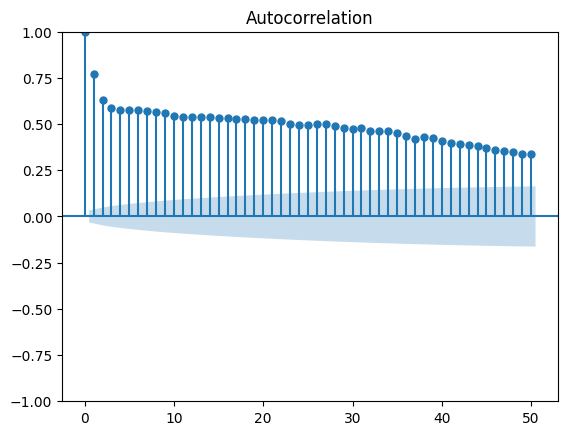

In [29]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data["Daily minimum temperatures"], lags=50)
plt.show()

In [30]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data["Daily minimum temperatures"])
print("Statistique de test:", result[0])
print("p-value:", result[1])

if result[1] < 0.05:
    print("La série est stationnaire.")
else:
    print("La série n'est pas stationnaire.")

Statistique de test: -4.444652847181698
p-value: 0.0002472372465853555
La série est stationnaire.
